![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://miro.medium.com/max/1400/1*tTbP_HjRgZpVjO6mc9Jm0A.png"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

# Page Views Visualizer

We will visualize time series data using a line chart, bar chart, and box plots. We will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help us understand the patterns in visits and identify yearly and monthly growth. (Database taken from the [Free Code Camp](https://www.freecodecamp.org/) data Analysis course)

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Exploratory Data Analysis (EDA)

### A- Loading libraries. Hands on!

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### B- Loading our data:

We are gonna parse dates and set index column to 'date'.

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv',parse_dates=['date'], index_col='date')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### C- A glance at the data:

In [3]:
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [4]:
df.tail()

,value
date,
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918
2019-12-02,220144
2019-12-03,158549


In [5]:
df.shape

(1304, 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [6]:
df.describe()

,value
count,1.304000e+03
mean,6.722068e+04
std,5.933964e+04
min,1.201000e+03
25%,3.575775e+04
50%,5.719750e+04
75%,8.388300e+04
max,1.173655e+06


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### D- Cleaning Data base:

In [23]:
df = df[
  (df['value'] >= df['value'].quantile(0.025)) &
  (df['value'] <= df['value'].quantile(0.975))]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


In [24]:
df.describe()

,value
count,1238.000000
mean,63060.147819
std,31674.626598
min,18060.000000
25%,37244.250000
50%,57197.500000
75%,81646.500000
max,177588.000000


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### E- Analysis and visualization:

* Let's Draw a line plot:

Text(0, 0.5, 'Page Views')

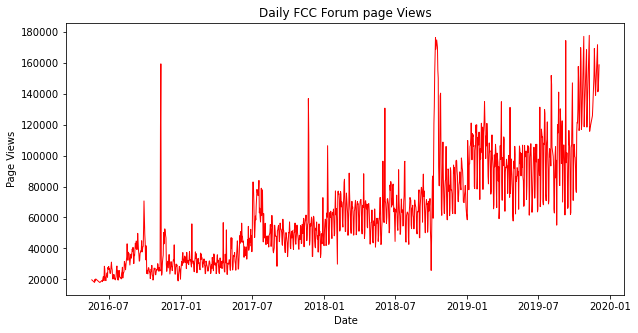

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(df.index, df['value'],'r',linewidth=1)

ax.set_title('Daily FCC Forum page Views')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

* Let's Draw the bar plot:

Let's copy and modify data for monthly bar plot

In [28]:
df['month'] = df.index.month
df['year']=df.index.year
df

,value,month,year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016
...,...,...,...
2019-11-24,138875,11,2019
2019-11-29,171584,11,2019
2019-11-30,141161,11,2019


Now, let's group everything by 'year and month' value mean.

In [44]:
df_bar['average'] = 1
df_bar

month    year
1        2016              NaN
         2017     32785.161290
         2018     58580.096774
         2019    102056.516129
2        2016              NaN
         2017     31113.071429
         2018     65679.000000
         2019    105968.357143
3        2016              NaN
         2017     29369.096774
         2018     62693.774194
         2019     91214.483871
4        2016              NaN
         2017     30878.733333
         2018     62350.833333
         2019     89368.433333
5        2016     19432.400000
         2017     34244.290323
         2018     56562.870968
         2019     91439.903226
6        2016     21875.105263
         2017     43577.500000
         2018     70117.000000
         2019     90435.642857
7        2016     24109.678571
         2017     65806.838710
         2018     63591.064516
         2019     97236.566667
8        2016     31049.193548
         2017     47712.451613
         2018     62831.612903
         2019    102717.3

In [45]:
df_bar = df.groupby(['year','month'])['value'].mean()
df_bar

year  month
2016  5         19432.400000
      6         21875.105263
      7         24109.678571
      8         31049.193548
      9         41476.866667
      10        27398.322581
      11        40448.633333
      12        27832.419355
2017  1         32785.161290
      2         31113.071429
      3         29369.096774
      4         30878.733333
      5         34244.290323
      6         43577.500000
      7         65806.838710
      8         47712.451613
      9         47376.800000
      10        47438.709677
      11        57701.566667
      12        48420.580645
2018  1         58580.096774
      2         65679.000000
      3         62693.774194
      4         62350.833333
      5         56562.870968
      6         70117.000000
      7         63591.064516
      8         62831.612903
      9         65941.733333
      10       111378.142857
      11        78688.333333
      12        80047.483871
2019  1        102056.516129
      2        105968.357143
  

Now, let's switch the order between the Columns year and month:

In [31]:
df_bar=df_bar.unstack()
df_bar

month  year
1      2016              NaN
       2017     32785.161290
       2018     58580.096774
       2019    102056.516129
2      2016              NaN
       2017     31113.071429
       2018     65679.000000
       2019    105968.357143
3      2016              NaN
       2017     29369.096774
       2018     62693.774194
       2019     91214.483871
4      2016              NaN
       2017     30878.733333
       2018     62350.833333
       2019     89368.433333
5      2016     19432.400000
       2017     34244.290323
       2018     56562.870968
       2019     91439.903226
6      2016     21875.105263
       2017     43577.500000
       2018     70117.000000
       2019     90435.642857
7      2016     24109.678571
       2017     65806.838710
       2018     63591.064516
       2019     97236.566667
8      2016     31049.193548
       2017     47712.451613
       2018     62831.612903
       2019    102717.310345
9      2016     41476.866667
       2017     47376.800000
  

* **Let's Draw the bar plot**:

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

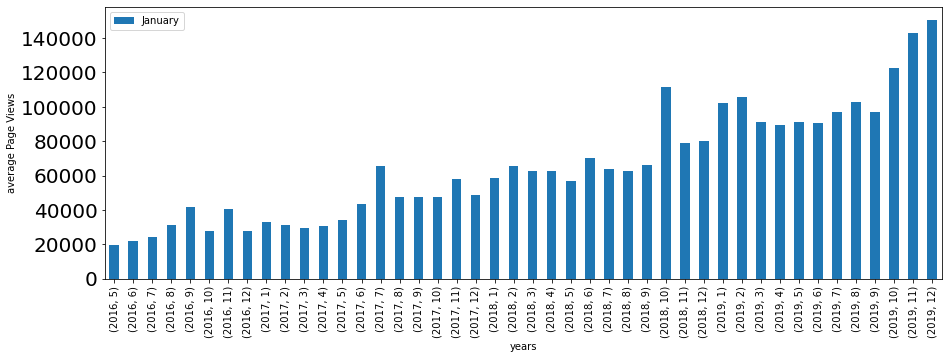

In [48]:
figure = df_bar.plot.bar(legend=True, figsize=(15,5), ylabel='average Page Views', xlabel='years').figure
plt.legend(['January','February','March','April','May','June','July','August','Septiembre','October','November','December'])
plt.xticks(fontsize=10)
plt.yticks(fontsize=20)

* **Let's Draw the Box-Plot**:

Let's prepare the data for the box plot:

In [51]:
df

,value,month,year
date,,,
2016-05-19,19736,5,2016
2016-05-26,18060,5,2016
2016-05-27,19997,5,2016
2016-05-28,19044,5,2016
2016-05-29,20325,5,2016
...,...,...,...
2019-11-24,138875,11,2019
2019-11-29,171584,11,2019
2019-11-30,141161,11,2019


In [50]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,month,year
0,2016-05-19,19736,May,2016
1,2016-05-26,18060,May,2016
2,2016-05-27,19997,May,2016
3,2016-05-28,19044,May,2016
4,2016-05-29,20325,May,2016
...,...,...,...,...
1233,2019-11-24,138875,Nov,2019
1234,2019-11-29,171584,Nov,2019
1235,2019-11-30,141161,Nov,2019
1236,2019-12-01,142918,Dec,2019


In [53]:
df_box['month_num'] = df_box['date'].dt.month
df_box = df_box.sort_values('month_num')
df_box

,date,value,month,year,month_num
210,2017-01-06,37353,Jan,2017,1
593,2018-01-24,61700,Jan,2018,1
592,2018-01-23,62758,Jan,2018,1
572,2018-01-03,56013,Jan,2018,1
573,2018-01-04,58910,Jan,2018,1
...,...,...,...,...,...
902,2018-12-02,73710,Dec,2018,12
901,2018-12-01,62373,Dec,2018,12
921,2018-12-21,85083,Dec,2018,12
188,2016-12-15,42333,Dec,2016,12


Let's Draw the box plots using Seaborn:

Text(0, 0.5, 'Page Views')

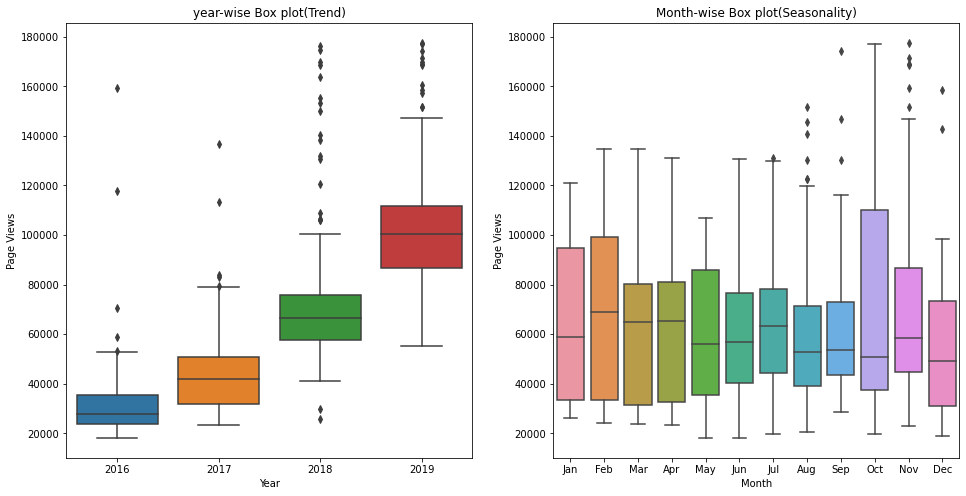

In [58]:
fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(16,8))
axes[0] =sns.boxplot(x=df_box['year'], y=df_box['value'], ax = axes[0])
axes[1] =sns.boxplot(x=df_box['month'], y=df_box['value'], ax = axes[1])

# Let's set labels
axes[0].set_title('year-wise Box plot(Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

axes[1].set_title('Month-wise Box plot(Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')